
# Practical Assignment 1


### [Bank Customer Churn Prediction](https://www.kaggle.com/kmalit/bank-customer-churn-prediction)
by Keldine Malit, 2018.

The objective of this notebook is to present an extensive analysis of a Customer Churn Dataset and to predict the customer churn rate. The first part of this notebook will focus on an exploration of the dataset and the other part will demonstrate different machine learning models for the prediction of churn.



## Problem definition

The aim of this study is to identify and visualize which factors contribute to customer churn, and then assess whether a model could be designed to do the following:
1. Classify if a customer is going to churn or not,
2. Choose a model, based on model performance, that will attach a probability to the churn to make it easier for customer service to target low hanging fruits in their efforts to prevent churn.

**We will use this notebook as the framework for your assignment. There are portions of the notebook that will require no editing, however you will be required to edit certain portions in order to complete the assignment.**
______

## Goal of Assignment
_______
Your assignment is to identify and perform the following:

**Question 1:** Which of the features is the most influential in ensuring an accurate classification? Provide a *detailed analysis* in the form of an EDA to justify your answer, and ensure that the sub-questions are answered appropriately.

**Question 2:** Upon removing the feature you indentified in Question 1, which classification model is able to perform best? Provide a *detailed performance analysis* to justify your answer.
_______

### Load Libraries

In [1]:
# data wrangling
import numpy as np
import pandas as pd

# data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.options.display.max_rows = None
pd.options.display.max_columns = None

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

# QUESTION 1

### Acquire data

The Python Pandas packages helps us work with our datasets. We start by acquiring the dataset into Pandas DataFrames.

In [2]:
# Read the data frame
df = pd.read_csv('Churn_Modelling.csv', delimiter=',')

### Describe the data

Identify the relevant features of the dataset:

In [ ]:
print(df.columns.values)

['RowNumber' 'CustomerId' 'Surname' 'CreditScore' 'Geography' 'Gender'
 'Age' 'Tenure' 'Balance' 'NumOfProducts' 'HasCrCard' 'IsActiveMember'
 'EstimatedSalary' 'Exited']


The dataset has 1000 rows with 14 attributes.

____

**1.1 Which features are categorical?**

These values classify the samples into sets of similar samples. Within categorical features are the values nominal, ordinal, or binary? Among other things this helps us select the appropriate plots for visualization.



**1.2 Which features are numerical?**

Which features are numerical? These values change from sample to sample. Within numerical features are the values discrete, continuous, or timeseries based? Among other things this helps us select the appropriate plots for visualization.

______


1.1
Categorical features are those that can classify the data into specific categories in this data set the following a categotical:
*   Geography, different categories of countries(NominaL).
*   Gender, which would be male/female making it (Binary).
* HasCrCard, whos if customer has credit card or not (Binary).
* IsActiveMember, showing if customer is an active member or not (Binary).
* Exited, shows if the customer exited the service or not (Binary).

1.2
Numerical features are those that have numerical values and significane numerically, the numerical features are:
* CustomerId, Indicates the customers unique identifier.
* CreditScore, Represents customers credit score (Continous).
* Age, represents customer age (Continous/time series).
* Tenure, represents number of years with bank (Continous/time series)
* Balance, represents customers balance (Continous).
* NumOfProducts, represents number of products customer has such as credit cards, insurance,loans (Discrete).
* EstimatedSalary, customers erstimated salary (Continous).

In [ ]:
# preview the data
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


_____
**1.3  Which features are mixed data types?**

Numerical, alphanumeric data within same feature. These are candidates for correction.



**1.4 Which features may contain errors or typos?**

This is harder to review for a large dataset, however reviewing a few samples from a smaller dataset may just tell us outright, which features may require correcting.
_______


In [ ]:
# Check for Mixed Data Types
mixed_data_columns = [col for col in df.columns if df[col].apply(type).nunique() > 1]
print("Columns with mixed data types:", mixed_data_columns)

# check for Errors or Typos in Data
non_numeric_columns = df.select_dtypes(exclude=['number']).columns
print("Columns with non-numeric data:", non_numeric_columns)

# check for missing or NaN values
missing_values = df.isna().sum()
print("Columns with missing values:", missing_values[missing_values > 0])

Columns with mixed data types: []
Columns with non-numeric data: Index(['Surname', 'Geography', 'Gender'], dtype='object')
Columns with missing values: Series([], dtype: int64)


In [ ]:
# check for mixed data types

1.3
Checks to see if there where mixed data types in the columns were done and none were found. so it appear that no corrections can be seen at this point.

1.4
Checks have also been done to see if there are no typos in the data as well as to see if there are no missing values, However from sampling the data it is seen that some Surnames have special characters in them which could be typos but that can not be confirmed  therefore it can be initially seen that no processing for this is required at this point.

In [ ]:
df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


______
**1.5 Which features contain blank, null or empty values?**

These will require correcting.



**1.6 What are the data types for various features?**

This helps us to know where conversions are needed.
______


1.5
From the below it can be seen that none of the features contains blank, null and empy values. Therefore no corrections of this type can be perceived at this point.

1.6
The data types of the features can be seen below and the datatypes appear to be sufficient for the types of data that each feature represents.
RowNumber        int64  
CustomerId       int64  
Surname          object
CreditScore      int64  
Geography        object
Gender           object
Age              int64  
Tenure           int64  
Balance          float64
NumOfProducts    int64  
HasCrCard        int64  
IsActiveMember   int64  
EstimatedSalary  float64
Exited           int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


____
**1.7 What is the distribution of numerical feature values across the samples?**

This helps us determine, among other early insights, how representative is the training dataset of the actual problem domain.
_____


In [3]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


1.7
The data is relatively balanced in age, but there is a skew toward customers with higher account balances, higher salaries, and relatively moderate tenure.


_____
**1.8 What is the distribution of categorical features?**
____

In [4]:
df.describe(include=['O'])

,Surname,Geography,Gender
count,10000,10000,10000
unique,2932,3,2
top,Smith,France,Male
freq,32,5014,5457


1.8
The distribution of the categorical features in the dataset shows that NumOfProducts ranges from 1 to 4 with all customers holding between 1 and 4 products. For the HasCrCard feature a majority of customers have a credit card, while a smaller group does not. The IsActiveMember feature also follows a binary distribution with the majority of customers being active members, and a smaller portion being inactive. Finally, the Exited feature indicating customer churn where most customers have not exited, and a smaller percentage have exited. This overall distribution highlights a high amount of active membership and credit card ownership with relatively low customer churn.

## Data Visualisation

Now we can continue confirming some of our assumptions using visualizations for analyzing the data.

______________
**1.9 Reassess the visualizations below, and add or remove as you see fit to provide a proper visual exploration.**
_________

### Correlating numerical features

Let us start by understanding correlations between numerical features and our solution goal (Exited).



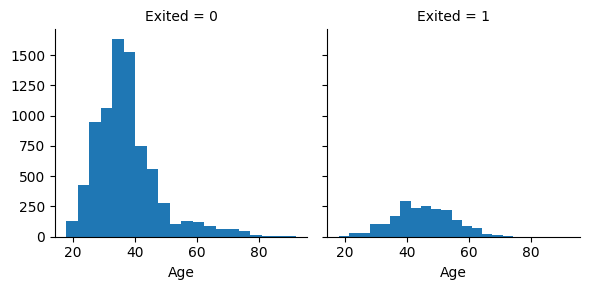

In [5]:
g = sns.FacetGrid(df, col='Exited')
g.map(plt.hist, 'Age', bins=20)

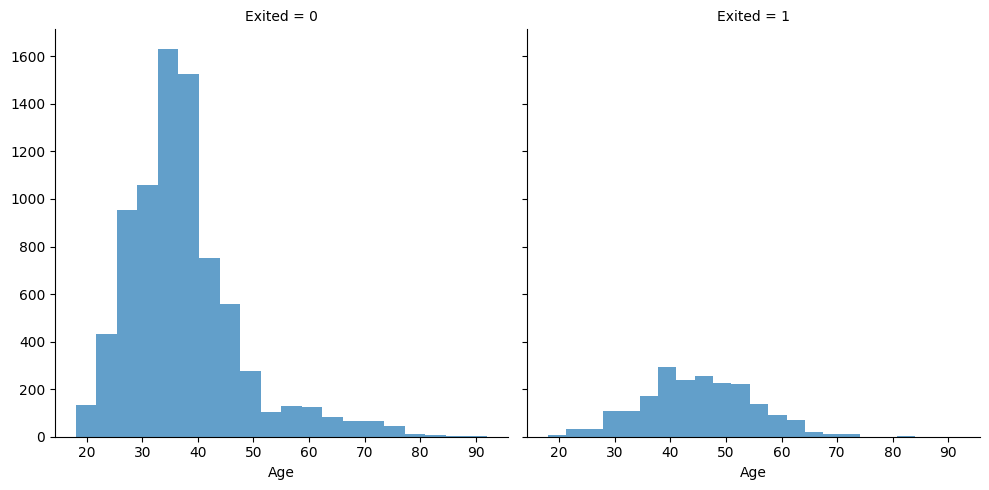

In [4]:
g = sns.FacetGrid(df, col='Exited', height=5)
g.map(plt.hist, 'Age', bins=20, alpha=0.7)

### Correlating numerical and ordinal features

We can combine multiple features for identifying correlations using a single plot. This can be done with numerical and categorical features which have numeric values.


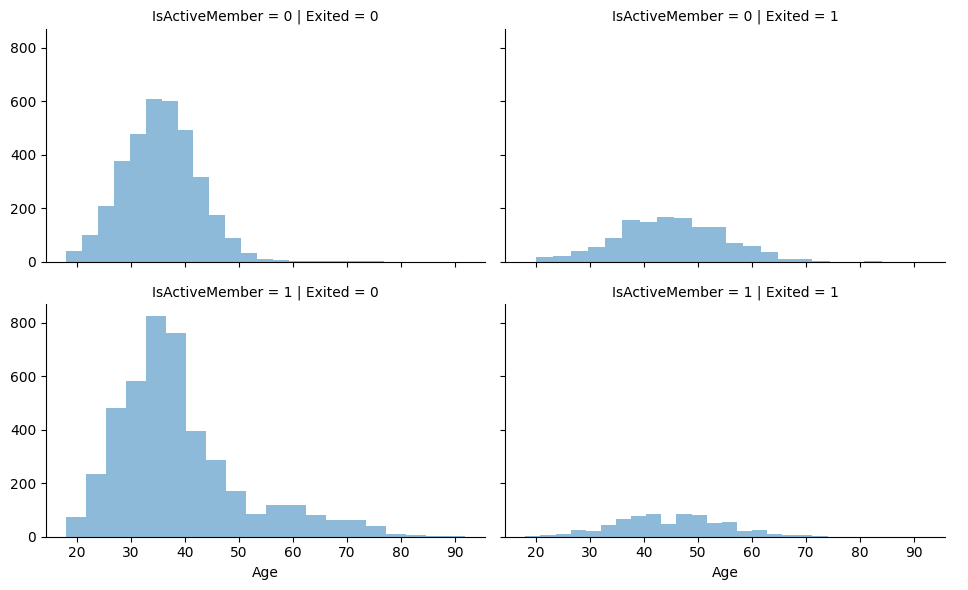

In [5]:
# grid = sns.FacetGrid(train_df, col='Pclass', hue='Survived')
grid = sns.FacetGrid(df, col='Exited', row='IsActiveMember', aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

### Correlating categorical features

Now we can correlate categorical features with our solution goal.


/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:718: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:723: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


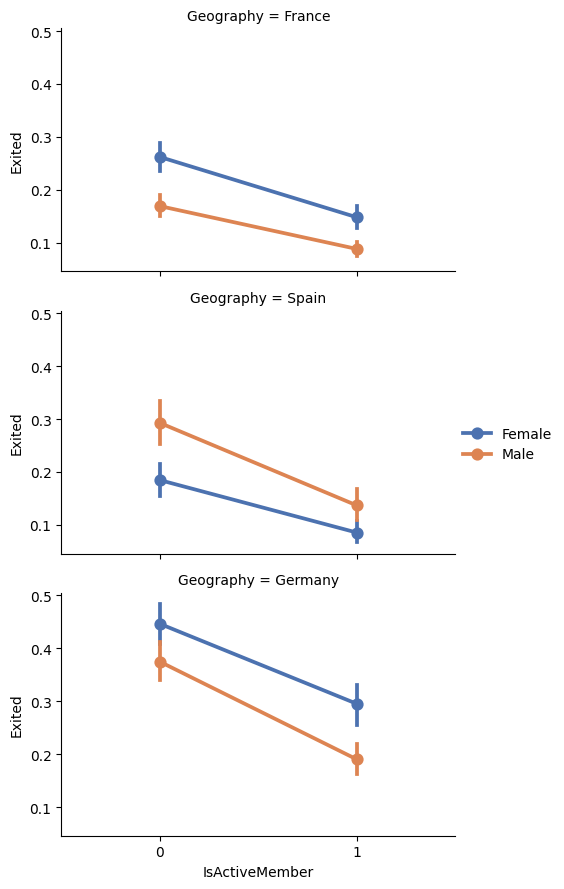

In [9]:
# grid = sns.FacetGrid(train_df, col='Embarked')
grid = sns.FacetGrid(df, row='Geography', aspect=1.6)
grid.map(sns.pointplot, 'IsActiveMember', 'Exited', 'Gender', palette='deep')
grid.add_legend()

<Axes: xlabel='IsActiveMember', ylabel='count'>

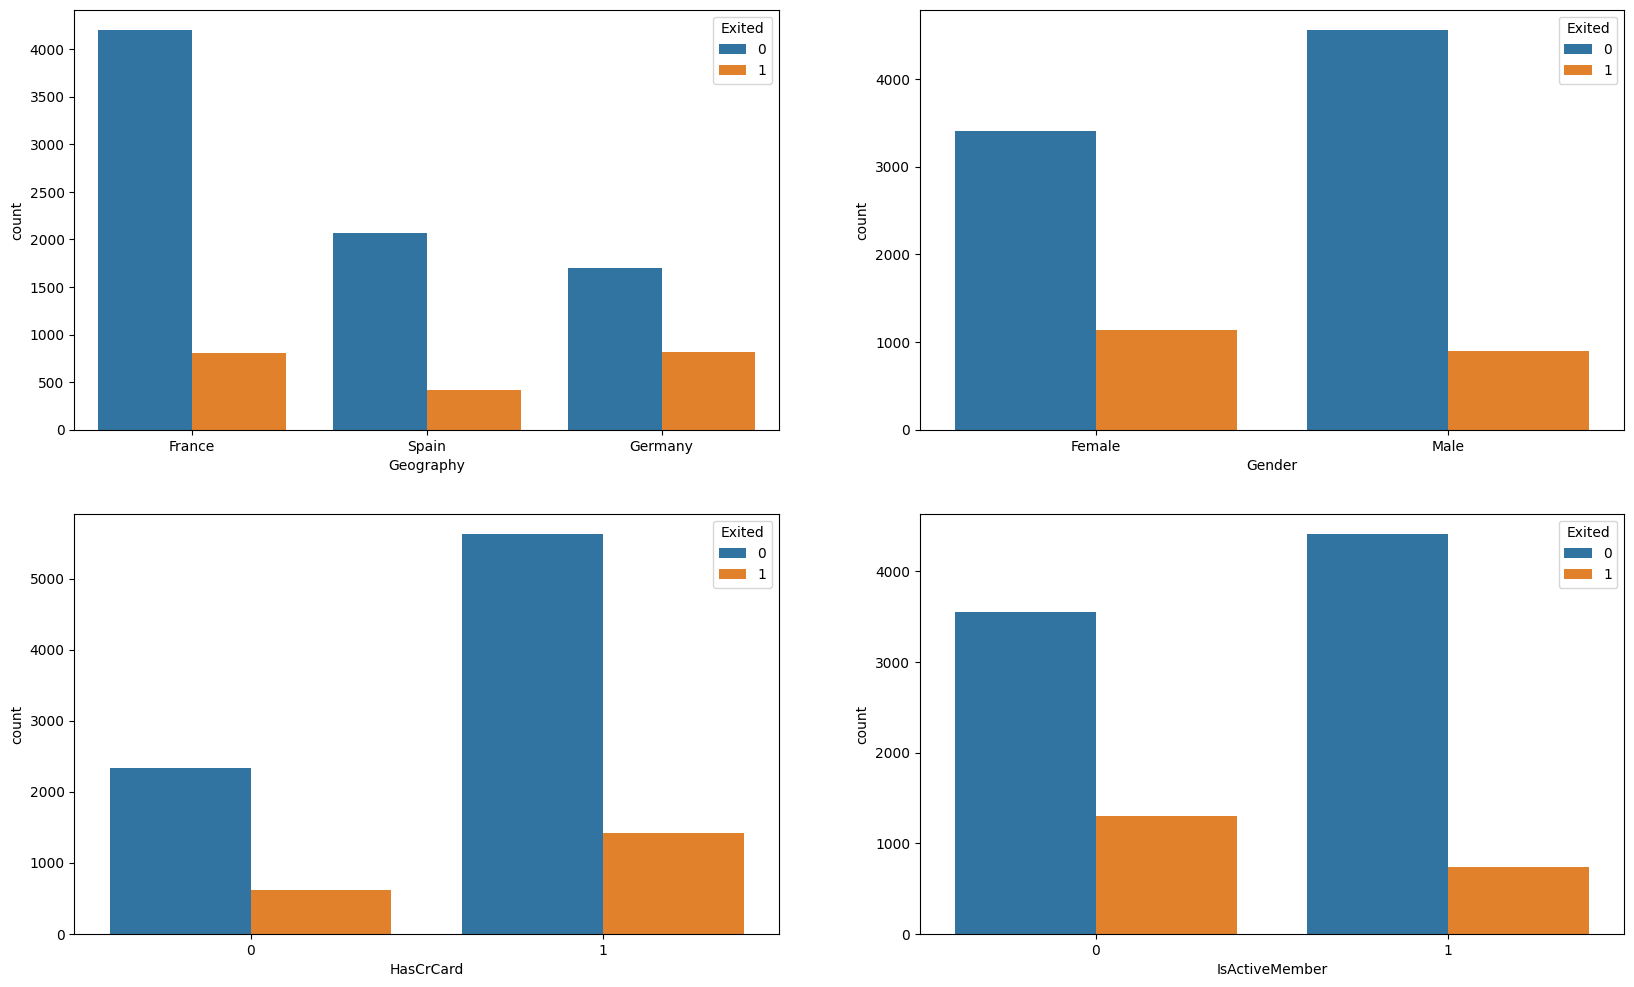

In [10]:
# We first review the 'Status' relation with categorical variables
fig, axarr = plt.subplots(2, 2, figsize=(20, 12))
sns.countplot(x='Geography', hue = 'Exited',data = df, ax=axarr[0][0])
sns.countplot(x='Gender', hue = 'Exited',data = df, ax=axarr[0][1])
sns.countplot(x='HasCrCard', hue = 'Exited',data = df, ax=axarr[1][0])
sns.countplot(x='IsActiveMember', hue = 'Exited',data = df, ax=axarr[1][1])

### Correlating categorical and numerical features

We may also want to correlate categorical features (with non-numeric values) and numeric features. We can consider correlating Geography (Categorical non-numeric), Gender (Categorical non-numeric), Age (Numeric continuous), with Exited (Categorical numeric).


/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:718: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-pack

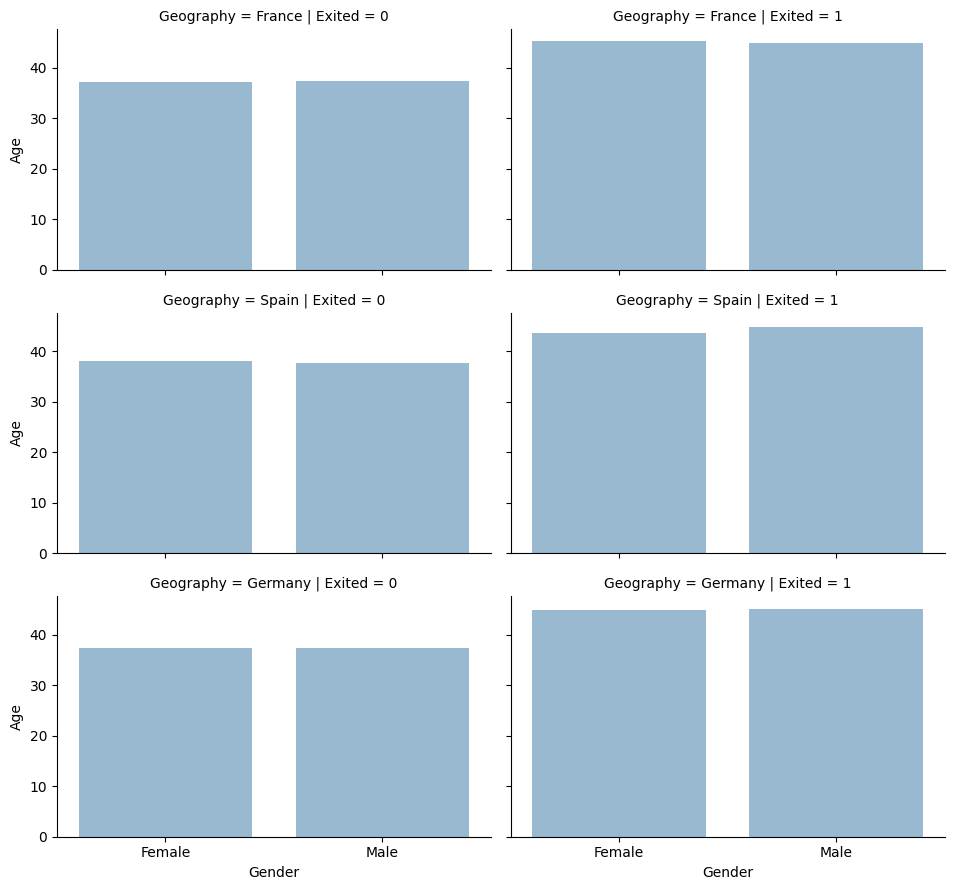

In [12]:
# grid = sns.FacetGrid(train_df, col='Embarked', hue='Survived', palette={0: 'k', 1: 'w'})
grid = sns.FacetGrid(df, row='Geography', col='Exited', aspect=1.6)
grid.map(sns.barplot, 'Gender', 'Age', alpha=.5, ci=None)
grid.add_legend()

<Axes: xlabel='Exited', ylabel='EstimatedSalary'>

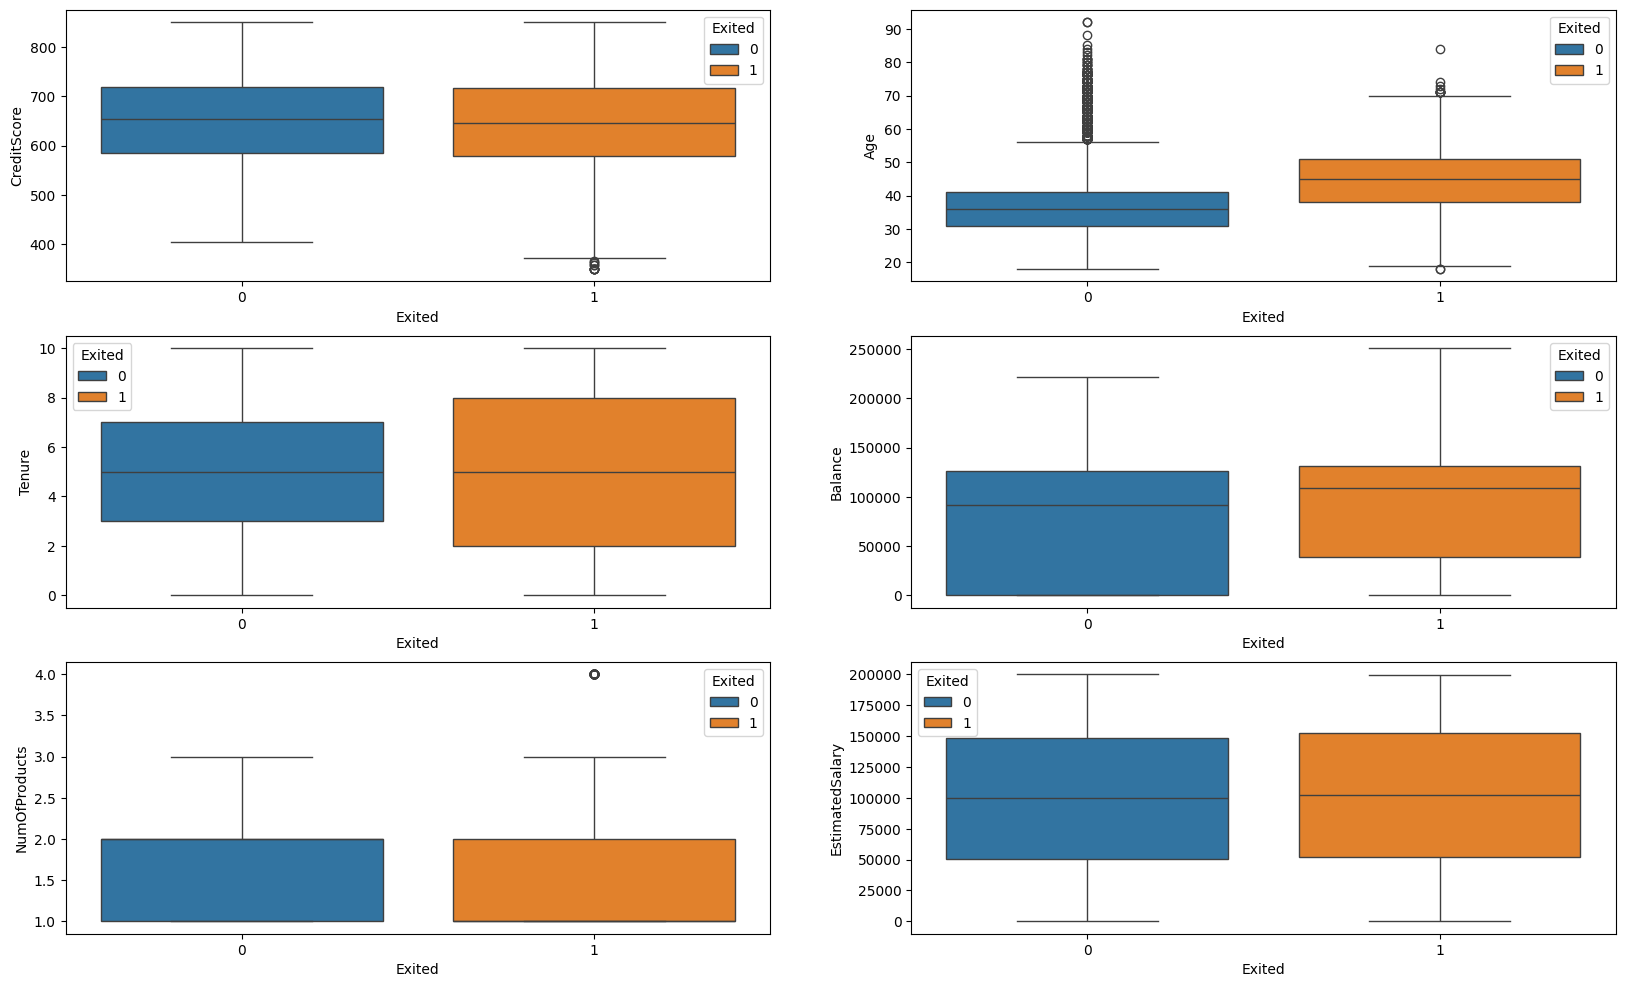

In [13]:
# Relations based on the continuous data attributes
fig, axarr = plt.subplots(3, 2, figsize=(20, 12))
sns.boxplot(y='CreditScore',x = 'Exited', hue = 'Exited',data = df, ax=axarr[0][0])
sns.boxplot(y='Age',x = 'Exited', hue = 'Exited',data = df , ax=axarr[0][1])
sns.boxplot(y='Tenure',x = 'Exited', hue = 'Exited',data = df, ax=axarr[1][0])
sns.boxplot(y='Balance',x = 'Exited', hue = 'Exited',data = df, ax=axarr[1][1])
sns.boxplot(y='NumOfProducts',x = 'Exited', hue = 'Exited',data = df, ax=axarr[2][0])
sns.boxplot(y='EstimatedSalary',x = 'Exited', hue = 'Exited',data = df, ax=axarr[2][1])

## Wrangle data

At this point your should have collected several assumptions and decisions regarding the datasets and solution requirements. So far we did not have to change a single feature or value to arrive at these. Let us now execute our decisions and assumptions for correcting, creating, and completing goals.

### Correcting by dropping features

This is a good starting goal to execute. By dropping features we are dealing with fewer data points, which speeds up our notebook and eases the analysis.

Based on our assumptions and decisions we want to drop the features: RowNumber, CustomerId, and Surname.



In [14]:
# Check columns list and missing values
df.isnull().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [15]:
# Get unique count for each variable
df.nunique()

,0
RowNumber,10000
CustomerId,10000
Surname,2932
CreditScore,460
Geography,3
Gender,2
Age,70
Tenure,11
Balance,6382
NumOfProducts,4


From the above, we will not require the first 2 attributes as the are specific to a customer. It is borderline with the surname as this would result to profiling so we exclude this as well.

In [16]:
# Drop the columns as explained above
df = df.drop(["RowNumber", "CustomerId", "Surname"], axis = 1)

In [17]:
# Review the top rows of what is left of the data frame
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [18]:
# Check variable data types
df.dtypes

,0
CreditScore,int64
Geography,object
Gender,object
Age,int64
Tenure,int64
Balance,float64
NumOfProducts,int64
HasCrCard,int64
IsActiveMember,int64
EstimatedSalary,float64


### Creating new feature extracting from existing
We seek to add features that are likely to have an impact on the probability of churning.

(-1.0, 5.0)

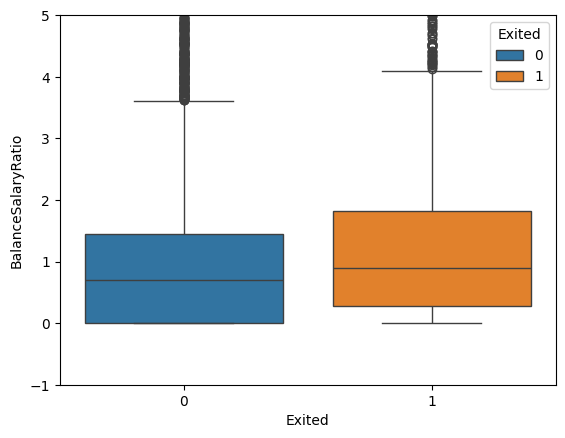

In [19]:
df['BalanceSalaryRatio'] = df.Balance/df.EstimatedSalary
sns.boxplot(y='BalanceSalaryRatio',x = 'Exited', hue = 'Exited',data = df)
plt.ylim(-1, 5)

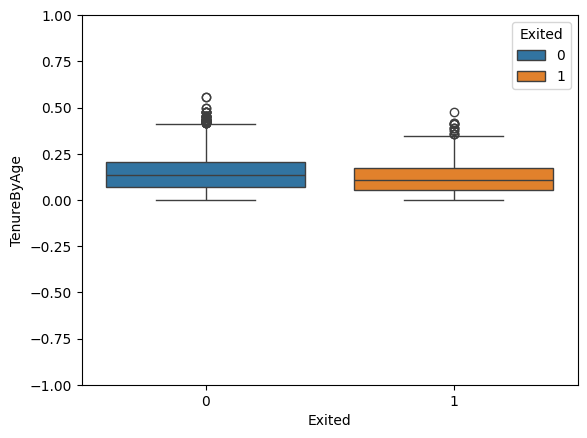

In [20]:
# Given that tenure is a 'function' of age, we introduce a variable aiming to standardize tenure over age:
df['TenureByAge'] = df.Tenure/(df.Age)
sns.boxplot(y='TenureByAge',x = 'Exited', hue = 'Exited',data = df)
plt.ylim(-1, 1)
plt.show()

In [21]:
'''Lastly we introduce a variable to capture credit score given age to take into account credit
behaviour visavis adult life :-)'''
df['CreditScoreGivenAge'] = df.CreditScore/(df.Age)

In [22]:
# Resulting Data Frame
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0.000000,0.047619,14.738095
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0.744677,0.024390,14.829268
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1.401375,0.190476,11.952381
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0.000000,0.025641,17.923077
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,1.587055,0.046512,19.767442


In [23]:
# Arrange columns by data type for easier manipulation
continuous_vars = ['CreditScore',  'Age', 'Tenure', 'Balance','NumOfProducts', 'EstimatedSalary', 'BalanceSalaryRatio',
                   'TenureByAge','CreditScoreGivenAge']
cat_vars = ['HasCrCard', 'IsActiveMember','Geography', 'Gender']
df = df[['Exited'] + continuous_vars + cat_vars]
df.head()

,Exited,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge,HasCrCard,IsActiveMember,Geography,Gender
0,1,619,42,2,0.00,1,101348.88,0.000000,0.047619,14.738095,1,1,France,Female
1,0,608,41,1,83807.86,1,112542.58,0.744677,0.024390,14.829268,0,1,Spain,Female
2,1,502,42,8,159660.80,3,113931.57,1.401375,0.190476,11.952381,1,0,France,Female
3,0,699,39,1,0.00,2,93826.63,0.000000,0.025641,17.923077,0,0,France,Female
4,0,850,43,2,125510.82,1,79084.10,1.587055,0.046512,19.767442,1,1,Spain,Female


### Converting categorical feature to numeric

In [24]:
'''For the one hot variables, we change 0 to -1 so that the models can capture a negative relation
where the attribute in inapplicable instead of 0'''
df.loc[df.HasCrCard == 0, 'HasCrCard'] = -1
df.loc[df.IsActiveMember == 0, 'IsActiveMember'] = -1
df.head()

,Exited,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge,HasCrCard,IsActiveMember,Geography,Gender
0,1,619,42,2,0.00,1,101348.88,0.000000,0.047619,14.738095,1,1,France,Female
1,0,608,41,1,83807.86,1,112542.58,0.744677,0.024390,14.829268,-1,1,Spain,Female
2,1,502,42,8,159660.80,3,113931.57,1.401375,0.190476,11.952381,1,-1,France,Female
3,0,699,39,1,0.00,2,93826.63,0.000000,0.025641,17.923077,-1,-1,France,Female
4,0,850,43,2,125510.82,1,79084.10,1.587055,0.046512,19.767442,1,1,Spain,Female


In [28]:
# One hot encode the categorical variables
lst = ['Geography', 'Gender']
remove = list()
for i in lst:
    if (df[i].dtype == str or df[i].dtype == object):
        for j in df[i].unique():
            df[i+'_'+j] = np.where(df[i] == j,1,-1)
        remove.append(i)
df = df.drop(remove, axis=1)
df.head()

,Exited,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge,HasCrCard,IsActiveMember,Geography_France,Geography_Spain,Geography_Germany,Gender_Female,Gender_Male
0,1,619,42,2,0.00,1,101348.88,0.000000,0.047619,14.738095,1,1,1,-1,-1,1,-1
1,0,608,41,1,83807.86,1,112542.58,0.744677,0.024390,14.829268,-1,1,-1,1,-1,1,-1
2,1,502,42,8,159660.80,3,113931.57,1.401375,0.190476,11.952381,1,-1,1,-1,-1,1,-1
3,0,699,39,1,0.00,2,93826.63,0.000000,0.025641,17.923077,-1,-1,1,-1,-1,1,-1
4,0,850,43,2,125510.82,1,79084.10,1.587055,0.046512,19.767442,1,1,-1,1,-1,1,-1


In [29]:
# minMax scaling the continuous variables
minVec = df[continuous_vars].min().copy()
maxVec = df[continuous_vars].max().copy()
df[continuous_vars] = (df[continuous_vars]-minVec)/(maxVec-minVec)
df.head()

,Exited,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge,HasCrCard,IsActiveMember,Geography_France,Geography_Spain,Geography_Germany,Gender_Female,Gender_Male
0,1,0.538,0.324324,0.2,0.000000,0.000000,0.506735,0.000000,0.085714,0.235083,1,1,1,-1,-1,1,-1
1,0,0.516,0.310811,0.1,0.334031,0.000000,0.562709,0.000070,0.043902,0.237252,-1,1,-1,1,-1,1,-1
2,1,0.304,0.324324,0.8,0.636357,0.666667,0.569654,0.000132,0.342857,0.168807,1,-1,1,-1,-1,1,-1
3,0,0.698,0.283784,0.1,0.000000,0.333333,0.469120,0.000000,0.046154,0.310859,-1,-1,1,-1,-1,1,-1
4,0,1.000,0.337838,0.2,0.500246,0.000000,0.395400,0.000150,0.083721,0.354739,1,1,-1,1,-1,1,-1


## Feature Importance

______
**Question 1.10:** Which of the features is the most influential in ensuring an accurate classification? Provide a detailed analysis in the form of an EDA to justify your answer. Below is some code you may use as part of your analysis of the data to assist with the argument you need to develop.

________

<Axes: xlabel='Exited', ylabel='count'>

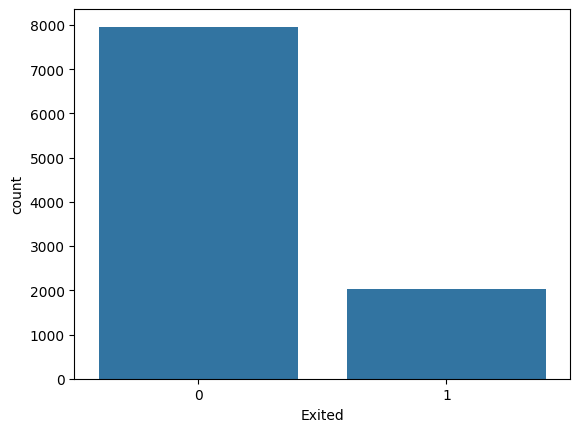

In [9]:
#chekc view exited data
sns.countplot(x='Exited', data=df)


<Axes: xlabel='Exited', ylabel='Age'>

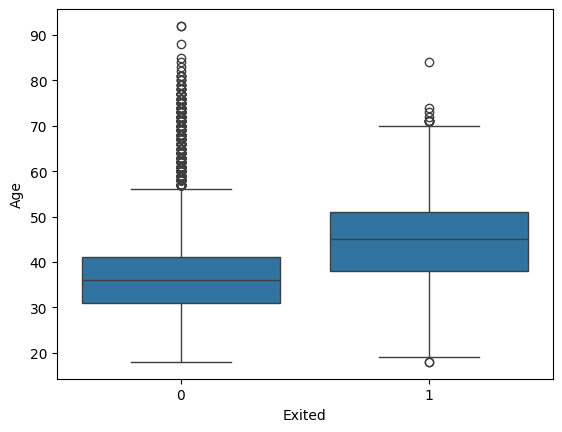

In [12]:
#review exited by age
sns.boxplot(x='Exited', y='Age', data=df)

<Axes: xlabel='Exited', ylabel='CreditScore'>

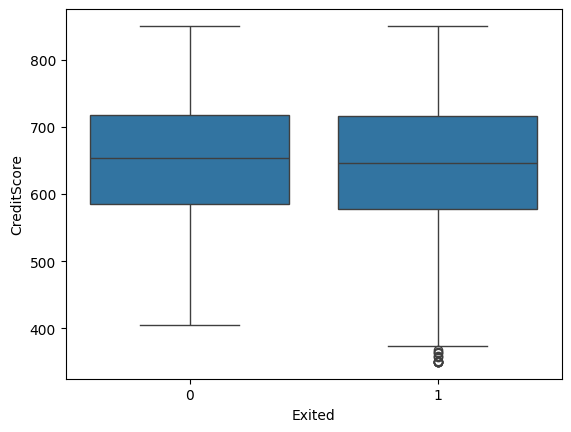

In [13]:
#check exited by their credit score
sns.boxplot(x='Exited', y='CreditScore', data=df)

<Axes: xlabel='Exited', ylabel='Balance'>

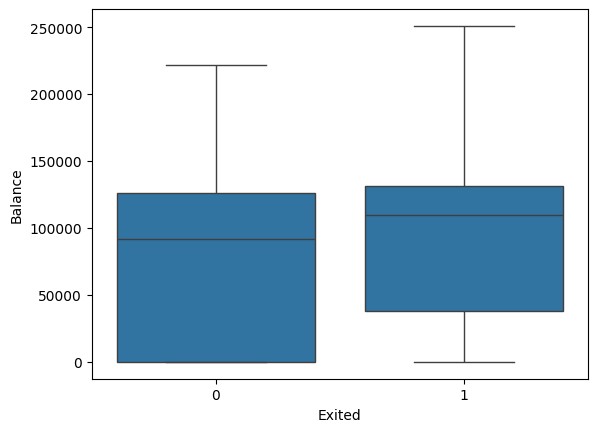

In [14]:
#check exited by balance
sns.boxplot(x='Exited', y='Balance', data=df)

<Axes: xlabel='Exited', ylabel='EstimatedSalary'>

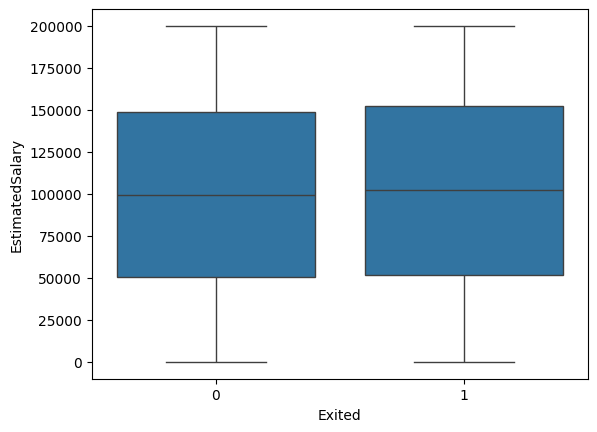

In [15]:
#exited against estimated salary
sns.boxplot(x='Exited', y='EstimatedSalary', data=df)

<Axes: >

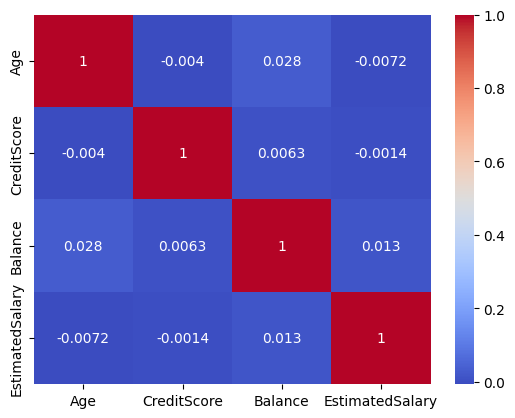

In [16]:
#analysing correlation
corr = df[['Age', 'CreditScore', 'Balance', 'EstimatedSalary']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')

1.10

Based on the exploratory data analysis the most influential features in ensuring accurate classification of customer churn are Age, Balance, and IsActiveMember. The target variable Exited shows that the majority of customers have not exited with around 8,000 customers staying. For those who have exited, the median age is between 40 and 50 years with a few outliers around 85 years old.Where as the median age for those who have not exited is between 30 and 40 years with one outlier around 92 years old.
While CreditScore shows a similar distribution for both groups, there are outliers in the exited group where some customers have significantly lower credit scores in the group that has exited. Customers who have exited tend to have higher Balances which could indicate that wealthier customers are more likely to churn. Estimated Salary appears to be similar between the two groups showing no strong between those that have and havent exited.
The correlation analysis reveals that Age and Balance have the highest correlation of 0.028, followed by Balance and Estimated Salary at 0.013, while Age and Estimated Salary have the lowest correlation at -0.072. This could suggest that while Age and Balance provide some separation between the groups Balance stands out as an important feature potentially influencing customer churn. In addition IsActiveMember is likely a strong predictor given its close relationship to customer retention.


# QUESTION 2

## Model and Predict

Now we are ready to train a model and predict the required solution. There are 60+ predictive modelling algorithms to choose from. We must understand the type of problem and solution requirement to narrow down to a select few models which we can evaluate. Our problem is a classification and regression problem. We want to identify relationship between output (Churned or not) with other variables or features (Age, Tenure, Balance...). We are also perfoming a category of machine learning which is called supervised learning as we are training our model with a given dataset. With these two criteria - Supervised Learning plus Classification and Regression, we can narrow down our choice of models to a few. These include:

- Logistic Regression
- KNN or k-Nearest Neighbors
- Support Vector Machines
- Naive Bayes classifier
- Decision Tree
- Random Forrest
- Perceptron
- Artificial neural network
- RVM or Relevance Vector Machine

________

**Question 2:**  Upon removing the feature you indentified in Question 1, as well as additional features you think are not relevant after your analysis, which classification model is able to perform best? Provide a detailed performance analysis to justify your answer.

*Idea:* If you are able to I would suggest that you perform hyperparameter tuning where appropriate.
____


Let's set up our training and testing data sets.


In [ ]:
# Split Train, test data
df_train = df.sample(frac=0.8,random_state=200)
df_test = df.drop(df_train.index)
print(len(df_train))
print(len(df_test))

In [ ]:
y_train = df_train["Exited"]
X_train = df_train.drop(["Exited"], axis = 1)
y_test = df_test["Exited"]
X_test = df_test.drop(["Exited"], axis = 1)

Logistic Regression is a useful model to run early in the workflow. Logistic regression measures the relationship between the categorical dependent variable (feature) and one or more independent variables (features) by estimating probabilities using a logistic function, which is the cumulative logistic distribution.

In [ ]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
Y_pred = logreg.predict(X_test)
acc_log = logreg.score(X_train, y_train) * 100
acc_log

Next we model using Support Vector Machines which are supervised learning models with associated learning algorithms that analyze data used for classification and regression analysis. Given a set of training samples, each marked as belonging to one or the other of **two categories**, an SVM training algorithm builds a model that assigns new test samples to one category or the other, making it a non-probabilistic binary linear classifier.

In [ ]:
# Support Vector Machines

svc = SVC()
svc.fit(X_train, y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, y_train) * 100, 2)
acc_svc

In pattern recognition, the k-Nearest Neighbors algorithm (or k-NN for short) is a non-parametric method used for classification and regression. A sample is classified by a majority vote of its neighbors, with the sample being assigned to the class most common among its k nearest neighbors (k is a positive integer, typically small).

In [ ]:
# K-nearest Neighbour

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, y_train) * 100, 2)
acc_knn

In machine learning, naive Bayes classifiers are a family of simple probabilistic classifiers based on applying Bayes' theorem with strong (naive) independence assumptions between the features.

In [ ]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, y_train) * 100, 2)
acc_gaussian

The perceptron is an algorithm for supervised learning of binary classifiers (functions that can decide whether an input, represented by a vector of numbers, belongs to some specific class or not). It is a type of linear classifier, i.e. a classification algorithm that makes its predictions based on a linear predictor function combining a set of weights with the feature vector.

In [ ]:
# Perceptron

perceptron = Perceptron()
perceptron.fit(X_train, y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, y_train) * 100, 2)
acc_perceptron

In [ ]:
# Linear SVC

linear_svc = LinearSVC()
linear_svc.fit(X_train, y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, y_train) * 100, 2)
acc_linear_svc

In [ ]:
# Stochastic Gradient Descent

sgd = SGDClassifier()
sgd.fit(X_train, y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, y_train) * 100, 2)
acc_sgd

This model uses a decision tree as a predictive model which maps features (tree branches) to conclusions about the target value (tree leaves). Tree models where the target variable can take a finite set of values are called classification trees; in these tree structures, leaves represent class labels and branches represent conjunctions of features that lead to those class labels.

In [ ]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)
acc_decision_tree

The next model Random Forests is one of the most popular. Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks, that operate by constructing a multitude of decision trees (n_estimators=100) at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees.

In [ ]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, y_train)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)
acc_random_forest

### Model evaluation

We can now rank our evaluation of all the models to choose the best one for our problem.

In [ ]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression',
              'Random Forest', 'Naive Bayes', 'Perceptron',
              'Stochastic Gradient Decent', 'Linear SVC',
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log,
              acc_random_forest, acc_gaussian, acc_perceptron,
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)